Draw a dumper moving pattern compare to other types of machines 

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("/Users/meomia/Documents/Nora_CO2_emission/data/GPSData/trips/03-07-2022.csv")
df_info = pd.read_csv("/Users/meomia/Documents/Nora_CO2_emission/data/GPSData/tripsInfo/03-07-2022.csv")

In [8]:
df_info["MachineType"].unique()

array(['Truck', 'Dumper'], dtype=object)

In [9]:
merged_df = pd.merge(df_info, df, on="TripLogId")

In [10]:
merged_df["Timestamp"] = pd.to_datetime(merged_df["Timestamp"])

In [11]:
merged_df["Timestamp"].dt.date.unique()

array([datetime.date(2022, 3, 7), datetime.date(2022, 3, 8)], dtype=object)

In [12]:
merged_df["Timestamp"].tail(10)

203516   2022-03-07 20:29:47.853000+00:00
203517   2022-03-07 20:32:46.860000+00:00
203518   2022-03-07 20:42:48.885000+00:00
203519   2022-03-08 11:41:10.931000+00:00
203520   2022-03-08 11:45:13.904000+00:00
203521   2022-03-08 11:45:20.904000+00:00
203522   2022-03-08 11:45:27.904000+00:00
203523   2022-03-08 11:46:23.901000+00:00
203524   2022-03-08 11:51:13.909000+00:00
203525   2022-03-08 11:53:19.904000+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [13]:
 day_df = merged_df[merged_df["Timestamp"].index < 203519]

In [14]:
day_df["DumperMachineNumber"].unique()

array([20, 13, 25, 11, 46, 37, 52, 15, 19, 22, 26,  5, 44, 16, 30, 36, 23,
        1, 38, 24, 41,  8,  4, 50, 49])

In [82]:
dumpers = day_df[day_df["MachineType"] == "Dumper"]
trucks = day_df[day_df["MachineType"] == "Truck"]

In [18]:
dumpers["TripLogId"].value_counts()

6225cc1c33b21600001e6aec    442
62264886d090c80000735a02    333
6225b879f1d26b0000aaa7a4    256
6226446ed007f200007032b2    244
6225c558274d3f00006e2422    232
                           ... 
6225d91e067598000036bd23     39
6225c25383fadc0000f8caf5     38
6225db529d133d0000f86f3c     38
6225d31373041e0000c580d8     38
6225d6e9cc997b000048f877     33
Name: TripLogId, Length: 106, dtype: int64

In [19]:
trip_2 = dumpers[dumpers["TripLogId"] == "6225cc1c33b21600001e6aec"]

In [20]:
from sklearn.cluster import DBSCAN
import seaborn as sns

In [21]:
model = DBSCAN(eps=0.001, min_samples=30) # maybe adjust DBSCAN parameters

In [22]:
def display(model, data):
    labels = model.fit_predict(data)
    #print(pd.DataFrame(labels).describe())
    sns.scatterplot(data=data, x="Longitude", y="Latitude", hue=labels, palette="Set1")
    return labels

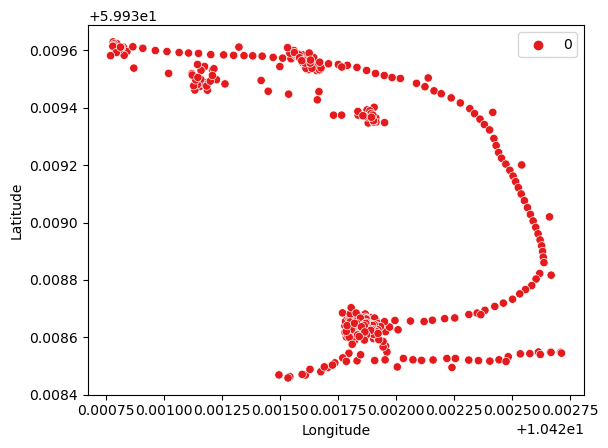

In [23]:
data = trip_2[["Longitude", "Latitude"]]
labels = display(model, data)

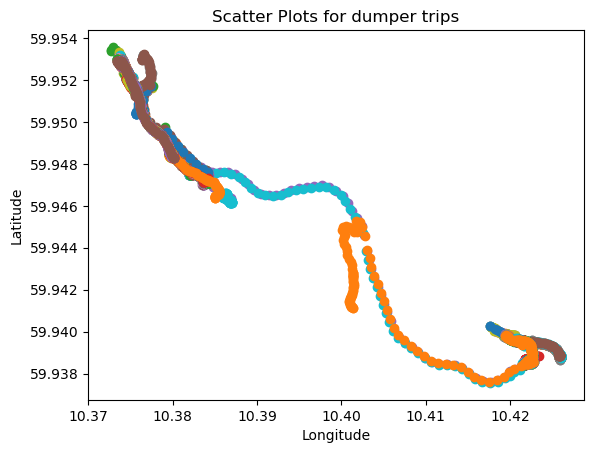

In [24]:
import matplotlib.pyplot as plt

# Group the DataFrame by TripID
grouped = dumpers.groupby('TripLogId')

# Create scatter plots for each trip
for trip_id, trip_data in grouped:
    plt.scatter(trip_data['Longitude'], trip_data['Latitude'], label=f'Trip {trip_id}')

# Add labels, legend, and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.legend()
plt.title('Scatter Plots for dumper trips')

# Show the plots
plt.show()


In [25]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    
    return distance

In [26]:
haversine_distance(59.954,10.37,59.938,10.43)

3.7854317238202095

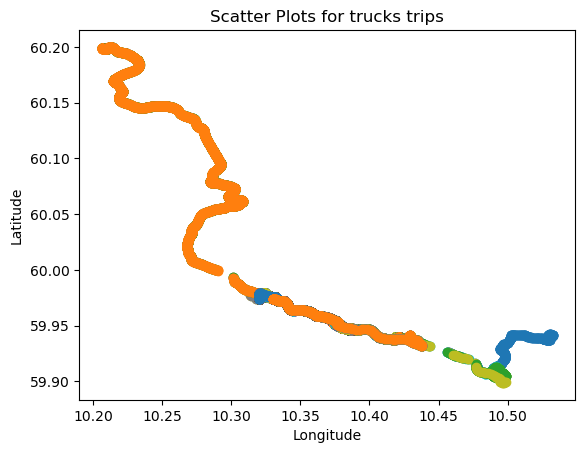

In [27]:
import matplotlib.pyplot as plt

# Group the DataFrame by TripID
grouped = trucks.groupby('TripLogId')

# Create scatter plots for each trip
for trip_id, trip_data in grouped:
    plt.scatter(trip_data['Longitude'], trip_data['Latitude'], label=f'Trip {trip_id}')

# Add labels, legend, and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.legend()
plt.title('Scatter Plots for trucks trips')

# Show the plots
plt.show()

In [28]:
haversine_distance(trucks["Latitude"].max(), trucks["Longitude"].min(), trucks["Latitude"].min(), trucks["Longitude"].max())

38.091448007175394

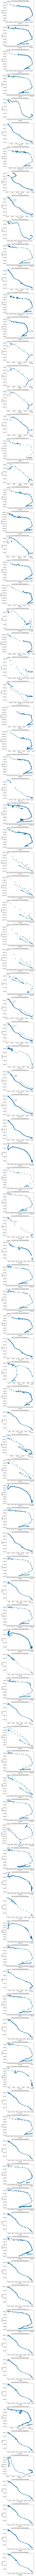

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the DataFrame by TripID
grouped = dumpers.groupby('TripLogId')

# Calculate the number of rows needed in the grid
num_rows = len(grouped)
num_cols = 1  # We want each trip's scatter plot in its own row

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 4 * num_rows))

# Create scatter plots for each trip
for (trip_id, trip_data), ax in zip(grouped, axes):
    ax.scatter(trip_data['Longitude'], trip_data['Latitude'])
    ax.set_title(f'Trip {trip_id}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the figure
plt.show()


In [30]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import unary_union
from geopandas.tools import sjoin

# Assuming you have dataframes named "trucks" and "dumpers" with "Latitude" and "Longitude" columns
# Create Point geometries for trucks and dumpers
geometry_trucks = [Point(xy) for xy in zip(trucks['Longitude'], trucks['Latitude'])]
geometry_dumpers = [Point(xy) for xy in zip(dumpers['Longitude'], dumpers['Latitude'])]

# Create GeoDataFrames
gdf_trucks = gpd.GeoDataFrame(trucks, geometry=geometry_trucks)
gdf_dumpers = gpd.GeoDataFrame(dumpers, geometry=geometry_dumpers)

# Buffer the points in gdf_dumpers to create circular polygons with a 200 meter radius
buffered_gdf_dumpers = gdf_dumpers.buffer(200)  # Buffer radius in meters

# Create a single polygon from the buffered geometries
buffered_polygon = unary_union(buffered_gdf_dumpers)

# Use spatial join to find trucks in gdf_trucks that are within the buffered_polygon
trucks_within_radius = sjoin(gdf_trucks, gpd.GeoDataFrame(geometry=[buffered_polygon]), predicate="within")



**Construct a GeoDataFrame from a DataFrame**

In [39]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [41]:
print(dumpers.head(2))

                     TripLogId  DumperMachineNumber MachineType  \
2564  6225a24a48b8de0000c6480b                   37      Dumper   
2565  6225a24a48b8de0000c6480b                   37      Dumper   

      LoadLongitude  LoadLatitude  DumpLongitude  DumpLatitude  \
2564      10.420804     59.939609      10.422354     59.938456   
2565      10.420804     59.939609      10.422354     59.938456   

     MassTypeMaterial  Quantity                        Timestamp   Latitude  \
2564            Stone      40.0 2022-03-07 06:12:24.965000+00:00  59.939609   
2565            Stone      40.0 2022-03-07 06:12:58.964000+00:00  59.939603   

      Longitude  Uncertainty  
2564  10.420804     3.221267  
2565  10.420820     2.886527  


In [83]:
# Create a geometry column from Latitude & Longitude

dumpers['geometry'] = dumpers.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)
trucks['geometry'] = trucks.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)

/var/folders/mf/9wn23qxd7kl2g5z31pzzjlrw0000gp/T/ipykernel_9490/1984149212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dumpers['geometry'] = dumpers.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)
/var/folders/mf/9wn23qxd7kl2g5z31pzzjlrw0000gp/T/ipykernel_9490/1984149212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trucks['geometry'] = trucks.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)


In [93]:
dumpers.geometry

2564       POINT (10.420804015582256 59.93960932240275)
2565       POINT (10.420820357142576 59.93960263655923)
2566         POINT (10.420867556840117 59.939602665522)
2567       POINT (10.420904872610688 59.93958538328874)
2568         POINT (10.42095949539368 59.9395668810006)
                              ...                      
203097     POINT (10.375727770699166 59.95126610172488)
203098    POINT (10.375584038986768 59.951258459777286)
203099     POINT (10.375679537060886 59.95126545672214)
203100      POINT (10.375686281834792 59.9512470123716)
203101      POINT (10.37558432292892 59.95135412770942)
Name: geometry, Length: 12001, dtype: object

In [96]:
degrees_crs = {"init": "epsg:4326"}
dumpers_geo = gpd.GeoDataFrame(dumpers, crs=degrees_crs, geometry = dumpers.geometry) #decimal degree unints
trucks_geo = gpd.GeoDataFrame(trucks, crs=degrees_crs, geometry = trucks.geometry)

In [104]:
#set mesuraments of a geometry column into a meters
dumpers_geo.geometry = dumpers_geo.geometry.to_crs(epsg = 3857)
trucks_geo.geometry = trucks_geo.geometry.to_crs(epsg = 3857)

In [94]:
dumpers_geo.geometry

2564      POINT (1160038.597 8386304.826)
2565      POINT (1160040.416 8386303.341)
2566      POINT (1160045.670 8386303.347)
2567      POINT (1160049.824 8386299.506)
2568      POINT (1160055.905 8386295.395)
                       ...               
203097    POINT (1155020.732 8388895.807)
203098    POINT (1155004.732 8388894.109)
203099    POINT (1155015.363 8388895.664)
203100    POINT (1155016.114 8388891.564)
203101    POINT (1155004.764 8388915.377)
Name: geometry, Length: 12001, dtype: geometry

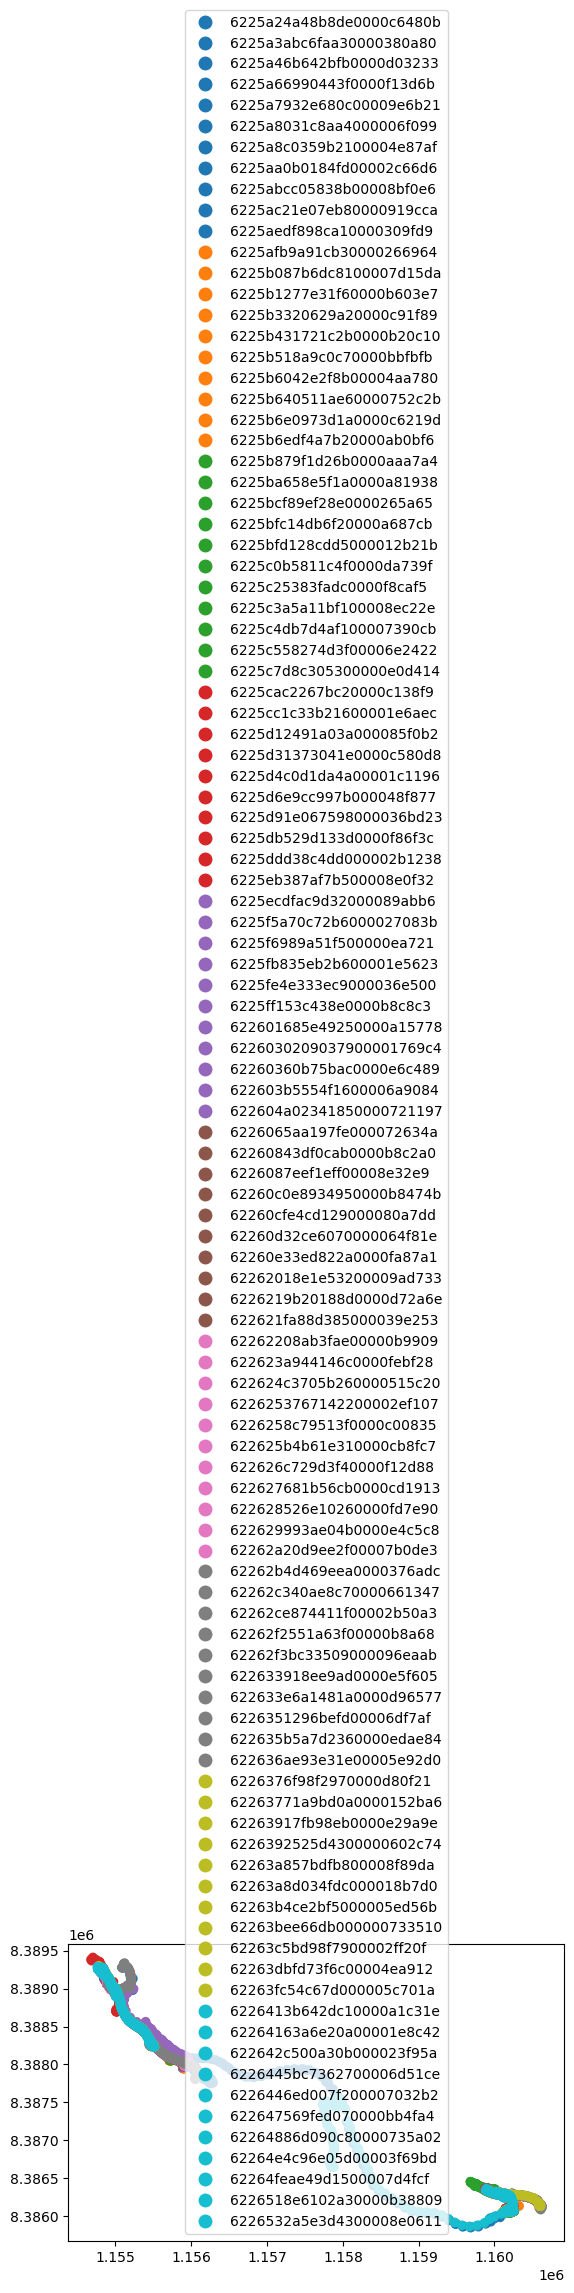

In [86]:
dumpers_geo.plot(column= "TripLogId", legend=True)
plt.show()

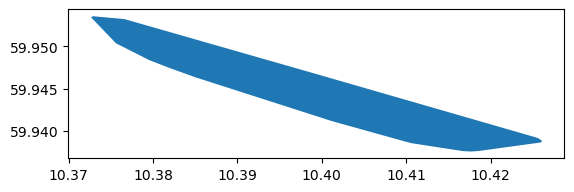

In [97]:
convex_hull = dumpers_geo.unary_union.convex_hull
convex_hull_gdf = gpd.GeoDataFrame(geometry=[convex_hull])
convex_hull_gdf.plot()
plt.show()

In [100]:
convex_hull_gdf.crs

In [75]:
convex_hull_gdf_geo = gpd.GeoDataFrame(convex_hull_gdf, crs= degrees_crs, geometry = convex_hull_gdf.geometry)
convex_hull_gdf_geo.geometry = convex_hull_gdf_geo.geometry.to_crs(epsg = 3857)

In [102]:
convex_hull_gdf_geo.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [105]:
trucks_geo.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [130]:
joint_gdf = gpd.sjoin(trucks_geo, convex_hull_gdf_geo, predicate="intersects")
joint_gdf

TripLogId  DumperMachineNumber MachineType  \
0       6225a07a03d57f0000de776a                   20       Truck   
1       6225a07a03d57f0000de776a                   20       Truck   
2       6225a07a03d57f0000de776a                   20       Truck   
3       6225a07a03d57f0000de776a                   20       Truck   
4       6225a07a03d57f0000de776a                   20       Truck   
...                          ...                  ...         ...   
203449  622654212310460000598ebd                    8       Truck   
203451  622654212310460000598ebd                    8       Truck   
203452  622654212310460000598ebd                    8       Truck   
203453  622654212310460000598ebd                    8       Truck   
203454  622654212310460000598ebd                    8       Truck   

        LoadLongitude  LoadLatitude  DumpLongitude  DumpLatitude  \
0           10.386030     59.946488      10.324452     59.976590   
1           10.386030     59.946488      10.324452     59.976590   
2           10.386030     59.946488      10.324452     59.976590   
3           10.386030     59.946488      10.324452     59.976590   
4           10.386030     59.946488      10.324452     59.976590   
...               ...           ...            ...           ...   
203449      10.377737     59.951869      10.330114     59.974062   
203451      10.377737     59.951869      10.330114     59.974062   
203452      10.377737     59.951869      10.330114     59.974062   
203453      10.377737     59.951869      10.330114     59.974062   
203454      10.377737     59.951869      10.330114     59.974062   

       MassTypeMaterial  Quantity                        Timestamp   Latitude  \
0                 Stone      16.0 2022-03-07 06:04:41.869000+00:00  59.946488   
1                 Stone      16.0 2022-03-07 06:05:00.868000+00:00  59.946486   
2                 Stone      16.0 2022-03-07 06:05:37.866000+00:00  59.946474   
3                 Stone      16.0 2022-03-07 06:06:36.863000+00:00  59.946478   
4                 Stone      16.0 2022-03-07 06:06:38.863000+00:00  59.946482   
...                 ...       ...                              ...        ...   
203449             Soil      17.0 2022-03-07 19:07:43.956000+00:00  59.937716   
203451             Soil      17.0 2022-03-07 19:07:55.956000+00:00  59.937748   
203452             Soil      17.0 2022-03-07 19:08:01.955000+00:00  59.937902   
203453             Soil      17.0 2022-03-07 19:08:07.955000+00:00  59.938092   
203454             Soil      17.0 2022-03-07 19:08:13.955000+00:00  59.938195   

        Longitude  Uncertainty                         geometry  index_right  
0       10.386030     8.942958  POINT (1156167.522 8387833.747)            0  
1       10.386051     9.521081  POINT (1156169.873 8387833.280)            0  
2       10.386081     8.552684  POINT (1156173.275 8387830.584)            0  
3       10.386038     8.830489  POINT (1156168.431 8387831.539)            0  
4       10.386002     9.107995  POINT (1156164.435 8387832.418)            0  
...           ...          ...                              ...          ...  
203449  10.416105     5.804054  POINT (1159515.501 8385883.996)            0  
203451  10.419110     4.657808  POINT (1159849.976 8385891.226)            0  
203452  10.419903     4.970603  POINT (1159938.256 8385925.303)            0  
203453  10.420787     4.721385  POINT (1160036.683 8385967.617)            0  
203454  10.421884     3.754214  POINT (1160158.807 8385990.594)            0  

[39913 rows x 15 columns]

In [120]:
type(convex_hull_gdf_geo)

geopandas.geodataframe.GeoDataFrame

In [121]:
type(trucks_geo)

geopandas.geodataframe.GeoDataFrame

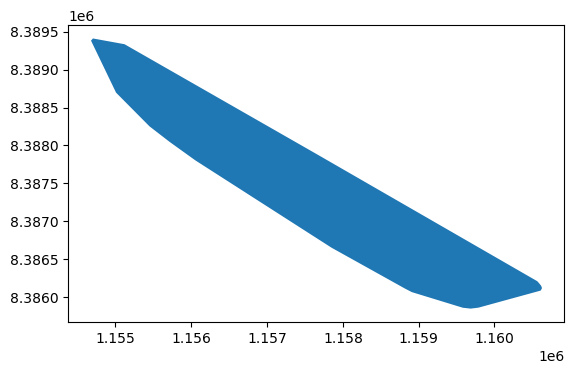

In [123]:
convex_hull_gdf_geo.plot()
plt.show()

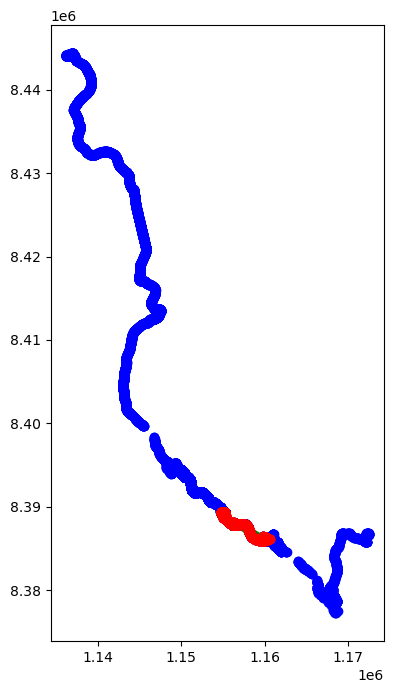

In [138]:
fig, ax = plt.subplots(figsize=(10, 8))
trucks_geo.plot(ax=ax, color="blue")
convex_hull_gdf_geo.plot(ax=ax, color="green")
joint_gdf.plot(ax=ax, color="red")
plt.show()

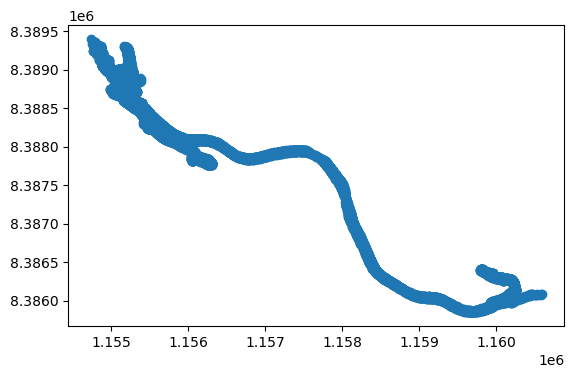

39913

In [132]:
joint_gdf.plot()
plt.show()
joint_gdf.shape[0]

***Indentify min and max timestaps on each trip***

In [156]:
joint_gdf.columns

Index(['TripLogId', 'DumperMachineNumber', 'MachineType', 'LoadLongitude',
       'LoadLatitude', 'DumpLongitude', 'DumpLatitude', 'MassTypeMaterial',
       'Quantity', 'Timestamp', 'Latitude', 'Longitude', 'Uncertainty',
       'geometry', 'index_right'],
      dtype='object')

In [160]:
min_max = joint_gdf.groupby('TripLogId')['Timestamp'].agg(['min', 'max']).reset_index()
print(min_max.head(2))

                  TripLogId                              min  \
0  6225a07a03d57f0000de776a 2022-03-07 06:04:41.869000+00:00   
1  6225a10729ca530000b90baf 2022-03-07 06:07:02.996000+00:00   

                               max  
0 2022-03-07 06:28:44.850000+00:00  
1 2022-03-07 06:43:56.994000+00:00  


In [161]:
add_columns = joint_gdf[["TripLogId","MassTypeMaterial", "Quantity"]]
print(add_columns.head(2))

                  TripLogId MassTypeMaterial  Quantity
0  6225a07a03d57f0000de776a            Stone      16.0
1  6225a07a03d57f0000de776a            Stone      16.0


In [167]:
result = min_max.merge(add_columns, on="TripLogId")
result

TripLogId                              min  \
0      6225a07a03d57f0000de776a 2022-03-07 06:04:41.869000+00:00   
1      6225a07a03d57f0000de776a 2022-03-07 06:04:41.869000+00:00   
2      6225a07a03d57f0000de776a 2022-03-07 06:04:41.869000+00:00   
3      6225a07a03d57f0000de776a 2022-03-07 06:04:41.869000+00:00   
4      6225a07a03d57f0000de776a 2022-03-07 06:04:41.869000+00:00   
...                         ...                              ...   
39908  622654212310460000598ebd 2022-03-07 18:51:12.920000+00:00   
39909  622654212310460000598ebd 2022-03-07 18:51:12.920000+00:00   
39910  622654212310460000598ebd 2022-03-07 18:51:12.920000+00:00   
39911  622654212310460000598ebd 2022-03-07 18:51:12.920000+00:00   
39912  622654212310460000598ebd 2022-03-07 18:51:12.920000+00:00   

                                   max MassTypeMaterial  Quantity  
0     2022-03-07 06:28:44.850000+00:00            Stone      16.0  
1     2022-03-07 06:28:44.850000+00:00            Stone      16.0  
2     2022-03-07 06:28:44.850000+00:00            Stone      16.0  
3     2022-03-07 06:28:44.850000+00:00            Stone      16.0  
4     2022-03-07 06:28:44.850000+00:00            Stone      16.0  
...                                ...              ...       ...  
39908 2022-03-07 19:08:13.955000+00:00             Soil      17.0  
39909 2022-03-07 19:08:13.955000+00:00             Soil      17.0  
39910 2022-03-07 19:08:13.955000+00:00             Soil      17.0  
39911 2022-03-07 19:08:13.955000+00:00             Soil      17.0  
39912 2022-03-07 19:08:13.955000+00:00             Soil      17.0  

[39913 rows x 5 columns]

In [168]:
joint_gdf

TripLogId  DumperMachineNumber MachineType  \
0       6225a07a03d57f0000de776a                   20       Truck   
1       6225a07a03d57f0000de776a                   20       Truck   
2       6225a07a03d57f0000de776a                   20       Truck   
3       6225a07a03d57f0000de776a                   20       Truck   
4       6225a07a03d57f0000de776a                   20       Truck   
...                          ...                  ...         ...   
203449  622654212310460000598ebd                    8       Truck   
203451  622654212310460000598ebd                    8       Truck   
203452  622654212310460000598ebd                    8       Truck   
203453  622654212310460000598ebd                    8       Truck   
203454  622654212310460000598ebd                    8       Truck   

        LoadLongitude  LoadLatitude  DumpLongitude  DumpLatitude  \
0           10.386030     59.946488      10.324452     59.976590   
1           10.386030     59.946488      10.324452     59.976590   
2           10.386030     59.946488      10.324452     59.976590   
3           10.386030     59.946488      10.324452     59.976590   
4           10.386030     59.946488      10.324452     59.976590   
...               ...           ...            ...           ...   
203449      10.377737     59.951869      10.330114     59.974062   
203451      10.377737     59.951869      10.330114     59.974062   
203452      10.377737     59.951869      10.330114     59.974062   
203453      10.377737     59.951869      10.330114     59.974062   
203454      10.377737     59.951869      10.330114     59.974062   

       MassTypeMaterial  Quantity                        Timestamp   Latitude  \
0                 Stone      16.0 2022-03-07 06:04:41.869000+00:00  59.946488   
1                 Stone      16.0 2022-03-07 06:05:00.868000+00:00  59.946486   
2                 Stone      16.0 2022-03-07 06:05:37.866000+00:00  59.946474   
3                 Stone      16.0 2022-03-07 06:06:36.863000+00:00  59.946478   
4                 Stone      16.0 2022-03-07 06:06:38.863000+00:00  59.946482   
...                 ...       ...                              ...        ...   
203449             Soil      17.0 2022-03-07 19:07:43.956000+00:00  59.937716   
203451             Soil      17.0 2022-03-07 19:07:55.956000+00:00  59.937748   
203452             Soil      17.0 2022-03-07 19:08:01.955000+00:00  59.937902   
203453             Soil      17.0 2022-03-07 19:08:07.955000+00:00  59.938092   
203454             Soil      17.0 2022-03-07 19:08:13.955000+00:00  59.938195   

        Longitude  Uncertainty                         geometry  index_right  
0       10.386030     8.942958  POINT (1156167.522 8387833.747)            0  
1       10.386051     9.521081  POINT (1156169.873 8387833.280)            0  
2       10.386081     8.552684  POINT (1156173.275 8387830.584)            0  
3       10.386038     8.830489  POINT (1156168.431 8387831.539)            0  
4       10.386002     9.107995  POINT (1156164.435 8387832.418)            0  
...           ...          ...                              ...          ...  
203449  10.416105     5.804054  POINT (1159515.501 8385883.996)            0  
203451  10.419110     4.657808  POINT (1159849.976 8385891.226)            0  
203452  10.419903     4.970603  POINT (1159938.256 8385925.303)            0  
203453  10.420787     4.721385  POINT (1160036.683 8385967.617)            0  
203454  10.421884     3.754214  POINT (1160158.807 8385990.594)            0  

[39913 rows x 15 columns]